In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import collections
from datetime import datetime, timedelta

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/koosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/koosha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_dataset = pd.read_excel('dataset_impersonator_with_like.xlsx')
print(df_dataset.shape[0])

3403


In [4]:
df_dataset.head()

combined_biography  combined_followee  \
0                                                NaN                  2   
1                                                NaN                 17   
2     Donald Trump Fan #VoteDonaldTrumpPresident2020                 18   
3  The account for the Future President of the Un...                 37   
4  Don't claim ownership of contents posted. We'r...                 36   

   combined_follower           combined_full_name  combined_is_private  \
0                  0                 donald trump                False   
1                  8              President Trump                 True   
2                 27  PresidentDonaldTrumpFanPage                False   
3                 51                   Ron Burton                False   
4                 64           We ❤ Donalds Trump                False   

   combined_is_verified  combined_mediacount combined_owener_external_url  \
0                 False                    0                           --   
1                 False                   26                           --   
2                 False                   10                           --   
3                 False                    2                           --   
4                 False                   95                           --   

                            combined_profile_pic_url  \
0  https://scontent-vie1-1.cdninstagram.com/vp/7a...   
1  https://scontent-cdg2-1.cdninstagram.com/vp/27...   
2  https://scontent-cdg2-1.cdninstagram.com/vp/b6...   
3  https://scontent-cdg2-1.cdninstagram.com/vp/3c...   
4  https://scontent-cdg2-1.cdninstagram.com/vp/0d...   

  combined_shortcode_username                 ...                   \
0             realdonaldtrump                 ...                    
1             realdonaldtrump                 ...                    
2             realdonaldtrump                 ...                    
3             realdonaldtrump                 ...                    
4             realdonaldtrump                 ...                    

   combined_similarity_username            combined_username  \
0                      0.000000                fatboy_sseees   
1                      0.000000     rightwing_conservative16   
2                      0.317107  presidentdonaldtrumpfanpage   
3                      0.000000                ronburton2040   
4                      0.000000                 weloveducks1   

                          comment_created_at  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4  2018-10-14 18:07:38,,,2018-11-01 14:09:59   

                              comment_id     comment_post_shortcode  \
0                                    NaN                        NaN   
1                                    NaN                        NaN   
2                                    NaN                        NaN   
3                                    NaN                        NaN   
4  17961837313135851,,,17917151383245056  Bo64QFVgtzy,,,BpnBfzzgXFR   

  comment_shortcode_username  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4   realdonaldtrump,,,flotus   

                                        comment_text comment_total  \
0                                                NaN             0   
1                                                NaN             0   
2                                                NaN             0   
3                                                NaN             0   
4  Happy birthday,  little Joseph 💚 xx,,,I looove...             2   

    owener_id                                 text  
0  8495406754                                   --  
1  4856884159                                   --  
2  9015620577                              

In [5]:
df_dataset[['comment_total', 'comment_created_at', 'comment_id',
       'comment_post_shortcode', 'comment_shortcode_username', 'comment_text']].head()

comment_total                         comment_created_at  \
0              0                                        NaN   
1              0                                        NaN   
2              0                                        NaN   
3              0                                        NaN   
4              2  2018-10-14 18:07:38,,,2018-11-01 14:09:59   

                              comment_id     comment_post_shortcode  \
0                                    NaN                        NaN   
1                                    NaN                        NaN   
2                                    NaN                        NaN   
3                                    NaN                        NaN   
4  17961837313135851,,,17917151383245056  Bo64QFVgtzy,,,BpnBfzzgXFR   

  comment_shortcode_username  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4   realdonaldtrump,,,flotus   

                                        comment_text  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  Happy birthday,  little Joseph 💚 xx,,,I looove...

In [6]:
def get_post_date(_row):
    
    date_list = []
    
    if (not _row['comment_total'] == 0):
        
        post_shortcodes = _row['comment_post_shortcode'].split(",,,")
         
        for shortcode in post_shortcodes:
            post = instagram_col_post.find_one( { "shortcode" : shortcode }, {'date_utc': 1} )
            date_list.append(post['date_utc'])

    myString = ",,,".join(date_list)
    _row['comment_post_date'] = myString
        
    return _row

In [7]:
df_dataset = df_dataset.apply(get_post_date, axis=1)

In [8]:
temp = df_dataset.loc[ 
        (
            (df_dataset['comment_total'] > 0)
        )
    ]
temp[['comment_post_date', 'comment_created_at']].head()

comment_post_date  \
4           2018-10-14 16:19:30,,,2018-10-31 19:49:46   
6   2018-10-26 19:01:08,,,2018-10-26 19:01:08,,,20...   
8                                 2018-11-06 11:51:13   
10                                2018-11-13 18:38:03   
11          2018-10-14 16:19:30,,,2018-10-27 16:26:46   

                                   comment_created_at  
4           2018-10-14 18:07:38,,,2018-11-01 14:09:59  
6   2018-10-26 19:02:29,,,2018-10-26 19:02:30,,,20...  
8                                 2018-11-06 16:03:35  
10                                2018-11-14 20:26:56  
11          2018-10-14 19:55:15,,,2018-10-27 18:28:29

In [9]:
def calculate_age(_row):
       
    list_diff_in_sec = []
    avg = 0
      
    if (not _row['comment_total'] == 0):
        
        post_dates = _row['comment_post_date'].split(",,,")
        comment_dates =  _row['comment_created_at'].split(",,,")
        
        total_diff_in_second = 0
        
        for i in range(len(post_dates)):
            
            post_time = pd.to_datetime(post_dates[i], format='%Y-%m-%d %H:%M:%S')
            comment_time = pd.to_datetime(comment_dates[i], format='%Y-%m-%d %H:%M:%S')
            
            dif = (comment_time - post_time)
#             time_difference_in_minutes = dif / timedelta(minutes=1)
            total_diff_in_second += dif.total_seconds()
            list_diff_in_sec.append(str(dif.total_seconds()))
#             sec = timedelta(seconds=list_diff[0])
#             time = str(sec)
#             print(time)

        avg = total_diff_in_second / len(post_dates)
    
    _row['comment_avg_age_sec'] = avg
    
    myString = ",,,".join(list_diff_in_sec)
    _row['comment_age_sec'] = myString

    return _row

In [10]:
df_dataset = df_dataset.apply(calculate_age, axis=1)

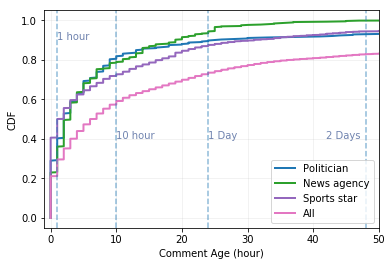

In [11]:
def plot_1():
    
    fig, (ax1) = plt.subplots(1,1, figsize=(6,4))
    
    df_plotician = df_dataset.loc[(df_dataset['combined_shortcode_username'] == DONALD_TRUMP) |
                        (df_dataset['combined_shortcode_username'] == BARACK_OBAMA) |
                        (df_dataset['combined_shortcode_username'] == EMMANUEL_MACRON) |
                        (df_dataset['combined_shortcode_username'] == THERESA_MAY)
                       ] 
    
    
    df_news = df_dataset.loc[(df_dataset['combined_shortcode_username'] == CNN) |
                        (df_dataset['combined_shortcode_username'] == BBC) |
                        (df_dataset['combined_shortcode_username'] == FOXNEWS) |
                        (df_dataset['combined_shortcode_username'] == REUTERS)
                       ]
    
    df_sport = df_dataset.loc[(df_dataset['combined_shortcode_username'] == LEOMESSI) |
                        (df_dataset['combined_shortcode_username'] == CRISTIANO_RONALDO) |
                        (df_dataset['combined_shortcode_username'] == RAFAEL_NADAL) |
                        (df_dataset['combined_shortcode_username'] == ROGER_FEDERER)
                       ]
    

    
    list_imposter_all = []
    for i in df_plotician['comment_age_sec']:
        if (not i == ""):
            posts = i.split(",,,")
            list_imposter_all.extend(posts)

    list_imposter_all = list(map(float, list_imposter_all))
    list_impostor_day = []
    
    for i in list_imposter_all:
        totalMinutes = i // 60
        totalHours = totalMinutes // 60
        totalday = totalHours // 24
        list_impostor_day.append(totalHours)

    
    # print(list_impostor_day)
    data =  pd.DataFrame(list_impostor_day)
    data.columns = ['period']
    ser = data[['period']].copy()
    ser = ser.sort_values(by='period')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)  
    ax5 = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=ax1, legend=True, label='Politician')
    
    
    
    
    list_imposter_all = []
    for i in df_news['comment_age_sec']:
        if (not i == ""):
            posts = i.split(",,,")
            list_imposter_all.extend(posts)

    list_imposter_all = list(map(float, list_imposter_all))
    list_impostor_day = []
    
    for i in list_imposter_all:
        totalMinutes = i // 60
        totalHours = totalMinutes // 60
        totalday = totalHours // 24
        list_impostor_day.append(totalHours)

    
    # print(list_impostor_day)
    data =  pd.DataFrame(list_impostor_day)
    data.columns = ['period']
    ser = data[['period']].copy()
    ser = ser.sort_values(by='period')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)  
    ax5 = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=ax1, legend=True, label='News agency')
    
    
    list_imposter_all = []
    for i in df_sport['comment_age_sec']:
        if (not i == ""):
            posts = i.split(",,,")
            list_imposter_all.extend(posts)

    list_imposter_all = list(map(float, list_imposter_all))
    list_impostor_day = []
    
    for i in list_imposter_all:
        totalMinutes = i // 60
        totalHours = totalMinutes // 60
        totalday = totalHours // 24
        list_impostor_day.append(totalHours)

    
    # print(list_impostor_day)
    data =  pd.DataFrame(list_impostor_day)
    data.columns = ['period']
    ser = data[['period']].copy()
    ser = ser.sort_values(by='period')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ser_cdf.index.name = "Comment Age (hour)"    
    ax5 = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=ax1, legend=True, label='Sports star')
    
    
    
    
    #====================
    df_mean = pd.DataFrame()
    posts = instagram_col_post.find( 
        {
            "$or": [
                {'owner_username': BARACK_OBAMA },
#                 {'owner_username': { '$ne': GOALCOM } },
#                 {'owner_username': { '$ne': NOVAK_DJOKOVIC } },
                    ]
        } , {'shortcode': 1, 'date_utc': 1}
    )

    list_all_periods = []

    for post in posts:
        post_shortcode = post['shortcode']
        post_time = pd.to_datetime(post['date_utc'], format='%Y-%m-%d %H:%M:%S')

        comments = list(instagram_col_comment.find({'post_shortcode': post_shortcode}, { 'created_at': 1 }))
        data =  pd.DataFrame(comments)
        
        #check if it is empty
        if (data.shape[0] == 0):
            continue
        
        data_new = data[['created_at']].copy()

        data_new['created_at'] = pd.to_datetime(data_new['created_at'], format='%Y-%m-%d %H:%M:%S')
        diff = (data_new['created_at'] - post_time).dt.total_seconds()

        list_all_periods.extend(diff)


    list_all_periods_hour = []
    for i in list_all_periods:
        totalMinutes = i // 60
        totalHours = totalMinutes // 60
        totalday = totalHours // 24        
        list_all_periods_hour.append(totalHours)


    datad =  pd.DataFrame(list_all_periods_hour)
    datad.columns = ['period']
    ser = datad[['period']].copy()
    ser = ser.sort_values(by='period')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)   
    ax5 = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=ax1, legend=True, label='All') 
    
    
    ax5.axes.set_xlim([-1,50])
    
#     ax5.axvline(x=1, linewidth=0.5, color='gray')
    ax5.axvline(x=1, linestyle='dashed', alpha=0.5)
    ax5.text(x=1, y=0.9, s='1 hour', alpha=0.7, color='#334f8d')

    ax5.axvline(x=10, linestyle='dashed', alpha=0.5)
    ax5.text(x=10, y=0.4, s='10 hour', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=24, linestyle='dashed', alpha=0.5)
    ax5.text(x=24, y=0.4, s='1 Day', alpha=0.7, color='#334f8d')
    
    ax5.axvline(x=48, linestyle='dashed', alpha=0.5)
    ax5.text(x=42, y=0.4, s='2 Days', alpha=0.7, color='#334f8d')
    
    ax5.grid(True, which='both', linestyle='-', alpha=0.2)
    ax5.set_ylabel("CDF")
    
    plt.savefig("plot_Similarity5_P1.pdf")
    
plot_1()    

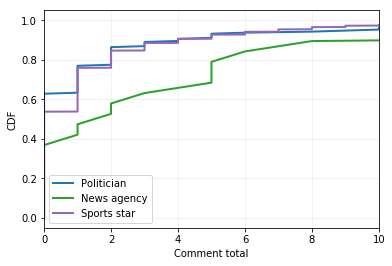

In [12]:
def plot_2():
    
    fig, (ax1) = plt.subplots(1,1, figsize=(6,4))
    
    df_plotician = df_dataset.loc[(df_dataset['combined_shortcode_username'] == DONALD_TRUMP) |
                        (df_dataset['combined_shortcode_username'] == BARACK_OBAMA) |
                        (df_dataset['combined_shortcode_username'] == EMMANUEL_MACRON) |
                        (df_dataset['combined_shortcode_username'] == THERESA_MAY)
                       ] 
    
    
    df_news = df_dataset.loc[(df_dataset['combined_shortcode_username'] == CNN) |
                        (df_dataset['combined_shortcode_username'] == BBC) |
                        (df_dataset['combined_shortcode_username'] == FOXNEWS) |
                        (df_dataset['combined_shortcode_username'] == REUTERS)
                       ]
    
    df_sport = df_dataset.loc[(df_dataset['combined_shortcode_username'] == LEOMESSI) |
                        (df_dataset['combined_shortcode_username'] == CRISTIANO_RONALDO) |
                        (df_dataset['combined_shortcode_username'] == RAFAEL_NADAL) |
                        (df_dataset['combined_shortcode_username'] == ROGER_FEDERER)
                       ]
    

    
    ser = df_plotician[['comment_total']].copy()
    ser = ser.sort_values(by='comment_total')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser) 
    ax = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=ax1, legend=True, label='Politician')
    
    
    ser = df_news[['comment_total']].copy()
    ser = ser.sort_values(by='comment_total')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ax = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=ax1, legend=True, label='News agency')
    
    
    ser = df_sport[['comment_total']].copy()
    ser = ser.sort_values(by='comment_total')
    ser[len(ser)] = ser.iloc[-1]
    cum_dist = np.linspace(0.,1.,len(ser))
    ser_cdf = pd.Series(cum_dist, index=ser)
    ax = ser_cdf.plot(logx=False, grid=True, linewidth=2, ax=ax1, legend=True, label='Sports star')
    
    
    ax.axes.set_xlim([0,10])
        
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    ax.set_xlabel("Comment total")
    ax.set_ylabel("CDF")
    
    plt.savefig("plot_Similarity5_P2.pdf")
    
    
plot_2()

In [13]:
temp = df_dataset.groupby('owener_id')
# temp.loc[temp['']]
temp.get_group.keys()


AttributeError: 'function' object has no attribute 'keys'

In [36]:
posts = list(instagram_col_post.find())
df_posts =  pd.DataFrame(posts)
# df_posts

In [37]:
def get_post_date(_shortcode):
    result = df_posts[df_posts['shortcode'] == _shortcode]
    dd = pd.to_datetime(result['date_utc'], format='%Y-%m-%d %H:%M:%S')
    return dd
    
# get_post_date("BqvsQvPljGG")

In [38]:
def getcomment_date(_row):
    _row['post-date'] = get_post_date(_row['post_shortcode'])
    _row['created_at'] = pd.to_datetime(_row['created_at'], format='%Y-%m-%d %H:%M:%S')
    _row['date_diff'] = _row['created_at'] - _row['post-date']
    _row['date_diff'] = _row['date_diff'].dt.total_seconds()

    return _row